In [556]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
from astropy.table import Table, join
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.spatial import cKDTree
import os
import sys

In [2]:
initial_values = Table.read('../spectrum_analysis/galah_dr4_initial_parameters_220714_lite.fits')

In [3]:
grids = Table.read('galah_dr4_model_trainingset_gridpoints.fits')

In [4]:
grids['model_name'] = np.array([str(int(grid['teff_subgrid']))+'_'+str("{:.2f}".format(grid['logg_subgrid']))+'_'+str("{:.2f}".format(grid['fe_h_subgrid'])) for grid in grids])

In [5]:
grid_index_tree = cKDTree(np.c_[grids['teff_subgrid']/1000.,grids['logg_subgrid'],grids['fe_h_subgrid']])

In [6]:
initial_values['grid_index'] = np.array([grid_index_tree.query([tgf[0]/1000.,tgf[1],tgf[2]]) for tgf in np.array([initial_values['teff'],initial_values['logg'],initial_values['fe_h']]).T])[:,1]

In [7]:
indices = initial_values['grid_index']
priority = Table()
d,c = np.unique(indices, return_counts=True)
priority['index_subgrid'] = np.array(d,dtype=int)
priority['counts_dr4_init'] = np.array(c,dtype=int)
priority = join(priority, grids, keys='index_subgrid')
priority.sort(keys='counts_dr4_init',reverse=True)

In [8]:
def test_grid_index_computations(test_grid_index = 1931, print_all_points=False,):
    if print_all_points:
        print('Printing grid points not yet computed for '+str(grids['model_name'][test_grid_index])+':')

    # Find upper and lower Teff points
    test_grid_teff = int(grids['teff_subgrid'][test_grid_index])
    if test_grid_teff <= 4000:
        test_grid_teff_lower = test_grid_teff - 100
    else:
        test_grid_teff_lower = test_grid_teff - 250
    if test_grid_teff <= 3900:
        test_grid_teff_higher = test_grid_teff + 100
    else:
        test_grid_teff_higher = test_grid_teff + 250

    # Find upper and lower logg points
    test_grid_logg = grids['logg_subgrid'][test_grid_index]
    test_grid_logg_lower = test_grid_logg - 0.5
    test_grid_logg_higher = test_grid_logg + 0.5

    # Find upper and lower fe_h points
    test_grid_fe_h = grids['fe_h_subgrid'][test_grid_index]
    if test_grid_fe_h <= -1.00:
        test_grid_fe_h_lower = test_grid_fe_h - 0.5
    else:
        test_grid_fe_h_lower = test_grid_fe_h - 0.25
    if test_grid_fe_h <= -1.5:
        test_grid_fe_h_higher = test_grid_fe_h + 0.5
    else:
        test_grid_fe_h_higher = test_grid_fe_h + 0.25

    for teff in [test_grid_teff_lower,test_grid_teff,test_grid_teff_higher]:
        for logg in [test_grid_logg_lower,test_grid_logg,test_grid_logg_higher]:
            for fe_h in [test_grid_fe_h_lower,test_grid_fe_h,test_grid_fe_h_higher]:
                t = grids['index_subgrid'][grids['model_name'] == str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h)]
                if len(t) > 0:
                    if t[0] not in grids_done:
                        if t[0] not in grids_started:
                            if print_all_points:
                                print(t[0],str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h))
                            else:
                                print(str(t[0])+',')
                        else:
                            if print_all_points:
                                print(t[0],str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h), 'already started')
                    else:
                        if print_all_points:
                            print(t[0],str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h), 'already done')
                else:
                    if print_all_points:
                        print('Not in GRID :', str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h))
                    

In [9]:
def test_grid_index_ready_for_training(test_grid_index = 1931, print_all_points=False,):
    if print_all_points:
        print('Printing grid points not yet computed for '+str(grids['model_name'][test_grid_index])+':')

    # Find upper and lower Teff points
    test_grid_teff = int(grids['teff_subgrid'][test_grid_index])
    if test_grid_teff <= 4000:
        test_grid_teff_lower = test_grid_teff - 100
    else:
        test_grid_teff_lower = test_grid_teff - 250
    if test_grid_teff <= 3900:
        test_grid_teff_higher = test_grid_teff + 100
    else:
        test_grid_teff_higher = test_grid_teff + 250

    # Find upper and lower logg points
    test_grid_logg = grids['logg_subgrid'][test_grid_index]
    test_grid_logg_lower = test_grid_logg - 0.5
    test_grid_logg_higher = test_grid_logg + 0.5

    # Find upper and lower fe_h points
    test_grid_fe_h = grids['fe_h_subgrid'][test_grid_index]
    if test_grid_fe_h <= -1.00:
        test_grid_fe_h_lower = test_grid_fe_h - 0.5
    else:
        test_grid_fe_h_lower = test_grid_fe_h - 0.25
    if test_grid_fe_h <= -1.5:
        test_grid_fe_h_higher = test_grid_fe_h + 0.5
    else:
        test_grid_fe_h_higher = test_grid_fe_h + 0.25

    for teff in [test_grid_teff_lower,test_grid_teff,test_grid_teff_higher]:
        for logg in [test_grid_logg_lower,test_grid_logg,test_grid_logg_higher]:
            for fe_h in [test_grid_fe_h_lower,test_grid_fe_h,test_grid_fe_h_higher]:
                t = grids['index_subgrid'][grids['model_name'] == str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h)]
                if len(t) > 0:
                    if t[0] not in grids_converted_to_nn_input:
                        print(t[0],str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h),' not ready')
                    else:
                        print(t[0],str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h),' done')
                else:
                    if print_all_points:
                        print('Not in GRID :', str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h))
                    

In [10]:
def test_progress(print_train_only=False):
    
    number_points_calculated_all = []
    number_points_needed_all = []
    
    for test_grid_index in grids['index_subgrid']:#[grids_converted_to_nn_input]:

        # Find upper and lower Teff points
        test_grid_teff = int(grids['teff_subgrid'][test_grid_index])
        if test_grid_teff <= 4000:
            test_grid_teff_lower = test_grid_teff - 100
        else:
            test_grid_teff_lower = test_grid_teff - 250
        if test_grid_teff <= 3900:
            test_grid_teff_higher = test_grid_teff + 100
        else:
            test_grid_teff_higher = test_grid_teff + 250

        # Find upper and lower logg points
        test_grid_logg = grids['logg_subgrid'][test_grid_index]
        test_grid_logg_lower = test_grid_logg - 0.5
        test_grid_logg_higher = test_grid_logg + 0.5

        # Find upper and lower fe_h points
        test_grid_fe_h = grids['fe_h_subgrid'][test_grid_index]
        if test_grid_fe_h <= -1.00:
            test_grid_fe_h_lower = test_grid_fe_h - 0.5
        else:
            test_grid_fe_h_lower = test_grid_fe_h - 0.25
        if test_grid_fe_h <= -1.5:
            test_grid_fe_h_higher = test_grid_fe_h + 0.5
        else:
            test_grid_fe_h_higher = test_grid_fe_h + 0.25

        number_points_calculated_each = 0
        number_points_needed_each = 0
        next_needed = None
        
        for teff in [test_grid_teff_lower,test_grid_teff,test_grid_teff_higher]:
            for logg in [test_grid_logg_lower,test_grid_logg,test_grid_logg_higher]:
                for fe_h in [test_grid_fe_h_lower,test_grid_fe_h,test_grid_fe_h_higher]:
                    
                    t = grids['index_subgrid'][grids['model_name'] == str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h)]
                    
                    if len(t) > 0:
                        number_points_needed_each += 1
                        if t[0] in grids_converted_to_nn_input:
                            number_points_calculated_each += 1
                        else:
                            next_needed = t[0]
                    else:
                        # there is no grid point for this one.
                        pass

        number_points_calculated_all.append(number_points_calculated_each)
        number_points_needed_all.append(number_points_needed_each)
        
        try:
            counts = priority['counts_dr4_init'][priority['index_subgrid']==test_grid_index][0]
            if counts < 10:
                counts = str(counts)+'    '
            elif counts < 100:
                counts = str(counts)+'   '
            elif counts < 1000:
                counts = str(counts)+'  '
            elif counts < 10000:
                counts = str(counts)+' '
            else:
                counts = str(counts)
        except:
            counts = 'none '
            
        space = ''
        if test_grid_fe_h >= 0:
            space = ' '

        if number_points_calculated_each == number_points_needed_each:
            if test_grid_index in trained_3x3x3:
                pass
                # print(str(test_grid_index)+' trained 3x3x3')
            else:
                print(str(test_grid_index)+' '+str(int(test_grid_teff))+'_'+"{:.2f}".format(test_grid_logg)+'_'+"{:.2f}".format(test_grid_fe_h)+space+' '+counts+' -----------------------------------------------------      TRAIN!!!')
        elif number_points_calculated_each > number_points_needed_each - 7:
            if next_needed in grids_done:
                if not print_train_only:
                    print(str(test_grid_index)+' '+str(int(test_grid_teff))+'_'+"{:.2f}".format(test_grid_logg)+'_'+"{:.2f}".format(test_grid_fe_h)+space+' '+counts+' only '+str(number_points_needed_each - number_points_calculated_each)+' more:', next_needed, '                             CONVERT')
            elif next_needed in grids_started:
                if not print_train_only:
                    print(str(test_grid_index)+' '+str(int(test_grid_teff))+'_'+"{:.2f}".format(test_grid_logg)+'_'+"{:.2f}".format(test_grid_fe_h)+space+' '+counts+' only '+str(number_points_needed_each - number_points_calculated_each)+' more:', next_needed, '                PBS running')
            else:
                if not print_train_only:
                    print(str(test_grid_index)+' '+str(int(test_grid_teff))+'_'+"{:.2f}".format(test_grid_logg)+'_'+"{:.2f}".format(test_grid_fe_h)+space+' '+counts+' only '+str(number_points_needed_each - number_points_calculated_each)+' more:', next_needed, ' Submit to PBS!')

In [1136]:
grids_started = [
742,
743,
754,
755,
856,
864,
865,
876,
877,
888,
889,
981,
1010,
1023,
1079,
1104,
1159,
1188,
1219,
1226,
1293,
1346,
1450,
1464,
1554,
1565,
1678,
1692,
1789,
]
print(len(grids_started))

29


In [1137]:
grids_done = [
    96,97,98,
    107,108,109,
    213,214,215,
    225,226,227,
    234,235,236,
    244,245,246,
    339,340,341,
    351,352,353,
    359,
    360,361,362,
    369,
    370,371,372,
    380,381,382,
    465,466,467,
    477,478,479, # for analysis of 131216001101084
    485,486,487,488,
    495,496,497,498,
    507,508,509,
    592,593,594,
    604,605,606,
    610,611,612,
    620,621,622,
    632,633,634,
    644,645,646,
    717,718,719,
    729,
    730,731,
    734,735,736,
    744,745,746,
    756,757,758,
    768,769,
    770,
    829,
    830,831,
    840,841,842,
    851,852,853,
    862,863,
    866,867,868,
    873,874,875,
    878,879,
    880,
    890,891,892,
    951,952,953,
    963,964,965,
    975,976,977,
    980,
    986,987,988,989,
    990,991,992,
    997,998,999,
    1000,1001,1002,1003,1004,
    1011,1012,1013,1014,1015,1016,
    1024,1025,1026,1027,1028,
    1075,1076,1077,1078,
    1087,1088,1089,
    1090,1091,
    1098,1099,
    1100,1101,1102,1103,
    1109,1110,1111,1112,1113,1114,1115,
    1120,1121,1122,1123,1124,1125,1126,1127,
    1132,1133,1134,1135,1136,1137,1138,1139,
    1140,
    1145,1146,1147,1148,1149,
    1150,1151,1152,
    1160,1161,1162,1163,1164,
    1184,1185,1186,1187,
    1196,1197,1198,1199,
    1200,1201,1202,
    1208,1209,
    1210,1211,1212,1213,1214,
    1220,1221,1222,1223,1224,1225,
    1231,1232,1233,1234,1235,1236,1237,
    1241,1242,1243,1244,1245,1246,1247,1248,1249,
    1253,1254,1255,1256,1257,1258,1259,
    1260,1261,1262,
    1266,1267,1268,1269,
    1270,1271,1272,1273,1274,1275,
    1278,1279,
    1280,1281,1282,1283,1284,1285,1286,1287,
    1294,1295,1296,1297,1298,1299,
    1306,1307,1308,1309,
    1310,1311,
    1318,1319,
    1320,1321,1322,1323,
    1324,
    1330,1331,1332,1333,1334,1335,1336,
    1340,1341,1342,1343,1344,1345,
    1350,1351,1352,1353,1354,1355,1356,1357,1358,
    1362,1363,1364,1365,1366,1367,1368,1369,
    1370,1371,
    1375,1376,1377,1378,1379,
    1380,1381,1382,1383,1384,
    1387,1388,1389,
    1390,1391,1392,1393,1394,1395,1396,
    1399,
    1400,1401,1402,1403,1404,1405,1406,1407,1408,
    1414,1415,1416,1417,1418,1419,
    1420,
    1427,1428,1429,
    1430,1431,1432,1433,
    1439,
    1440,1441,1442,1443,1444,1445,
    1446,1447,1448,1449,
    1456,1457,1458,1459,
    1460,1461,1462,1463,
    1468,1469,
    1470,1471,1472,1473,1474,1475,1476,1477,
    1481,1482,1483,1484,1485,1486,1487,1488,1489,
    1490,
    1493,1494,1495,1496,1497,1498,1499,
    1500,1501,1502,
    1505,1506,1507,1508,1509,
    1510,1511,1512,1513,1514,
    1519,
    1520,1521,1522,1523,1524,1525,1526,
    1532,1533,1534,1535,1536,1537,1538,1539,
    1545,1546,1547,1548,1549,
    1550,1551,
    1552,1553,
    1560,1561,1562,1563,1564,
    1571,1572,1573,1574,1575,1576,1577,1578,1579,
    1580,
    1583,1584,1585,1586,1587,1588,1589,
    1590,1591,1592,1593,
    1595,1596,1597,1598,1599,
    1600,1601,1602,1603,1604,1605,
    1608,1609,
    1610,1611,1612,1613,1614,1615,1616,1617,
    1620,1621,1622,1623,1624,
    1625,1626,1627,1628,1629,
    1635,1636,1637,1638,1639,
    1640,1641,
    1647,1648,1649,
    1650,1651,1652,1653,
    1659,
    1660,1661,1662,1663,
    1670,1671,1672,1673,1674,1675,1676,1677,
    1682,1683,1684,1685,1686,1687,1688,1689,
    1690,1691,
    1694,1695,1696,1697,1698,1699,
    1700,1701,1702,1703,1704,
    1707,1708,1709,
    1710,1711,1712,
    1713,1714,1715,1716,
    1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,
    1733,1734,1735,1736,1737,1738,1739,
    1740,1741,
    1746,1747,1748,1749,
    1750,1751,1752,1753,
    1765,1766,1767,1768,1769,
    1770,1771,
    1777,1778,1779,
    1780,1781,1782,1783,1784,
    1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,
    1802,1803,1804,1805,1806,1807,1808,1809,
    1810,1811,
    1814,1815,1816,1817,1818,1819,
    1820,1821,1822,1823,1824,
    1827,1828,1829,
    1830,1831,1832,1833,1834,1835,1836,
    1840,1841,1842,1843,1844,1845,1846,1847,1848,
    1876,1877,1878,1879,
    1880,1881,1882,
    1888,1889,
    1890,1891,
    1892,1893,1894,1895,1896,1897,
    1900,1901,1902,1903,
    1904,1905,1906,1907,1908,1909,
    1910,
    1913,1914,1915,1916,1917,1918,1919,
    1920,1921,1922,
    1925,1926,1927,1928,1929,
    1930,1931,1932,1933,1934,
    1972,1973,1974,1975,1976,1977,1978,1979,
    1980,
    1984,1985,1986,1987,1988,1989,
    1990,1991,1992,1993,
    1996,1997,1998,1999,
    2000,2001,2002,2003,2004,2005,
    2008,2009,
    2010,2011,2012,2013,2014,2015,2016,2017,
    2049,
    2050,2051,2052,2053,2054,2055,2056,2057,
    2061,2062,2063,2064,2065,2066,2067,2068,2069,
    2070,
    2073,2074,2075,2076,2077,2078,2079,
    2080,2081,2082,
    2085,2086,2087,2088,2089,
    2090,2091,2092,2093,2094,
    2123,2124,2125,2126,2127,2128,2129,
    2130,
    2135,2136,2137,2138,2139,
    2140,2141,2142,2143,
    2147,2148,2149,
    2150,2151,2152,2153,2154,2155,
    2159,
    2160,2161,2162,2163,2164,2165,2166,2167,
    2197,2198,2199,
    2200,2201,2202,
    2209,
    2210,2211,2212,2213,2214,
    2221,2222,2223,2224,2225,2226,
    2233,2234,2235,2236,2237,2238,
    2305,2306,2307,
    2346,2347,2348,
    2358,2359,
    2360,
    2370,2371,2372,
    2281,2282,2283,2284,
    2293,2294,2295,2296,
    2308,
    2349,
    2361,
    2373,
    2398,2399,
    2400,2401,
    2408,2409,
    2410,2411,2412,2413,
    2420,2421,2422,2423,2424,2425,
    2432,2433,2434,2435,2436,2437,
    2457,2458,2459,
    2460,
    2468,2469,
    2470,2471,2472,2473,
    2480,2481,2482,2483,2484,2485,
    2492,2493,2494,2495,2496,2497,
]
print(len(grids_done),len(grids_done) * 280)

909 254520


In [1138]:
# # selection = (priority['fe_h_subgrid'] <= -2) & (priority['counts_dr4_init'] > 200)
# # selection = (priority['fe_h_subgrid'] <= -1.5) & (priority['counts_dr4_init'] > 200) & (priority['teff_subgrid'] <= 6000)
# # selection = (priority['fe_h_subgrid'] <= -0.75) & (priority['counts_dr4_init'] > 2800)
# # selection = (priority['teff_subgrid'] == 7250) & (priority['counts_dr4_init'] > 200)
# # selection = (priority['counts_dr4_init'] <= 2500) & (priority['counts_dr4_init'] > 2000)
# # selection = (priority['counts_dr4_init'] <= 2000) & (priority['counts_dr4_init'] > 1000)
# # selection = (priority['teff_subgrid'] <= 3999) &(priority['logg_subgrid'] >= 4.0) & (priority['counts_dr4_init'] > 290)
# # selection = (priority['logg_subgrid'] <= 3.5) &(priority['logg_subgrid'] >= 2.5) & (priority['counts_dr4_init'] > 2000)
# # selection = (priority['teff_subgrid'] <= 3500) & (priority['counts_dr4_init'] > 200)

# f, gs = plt.subplots(1,2,figsize=(10,5))
# ax=gs[0]
# s = ax.scatter(
#     priority['teff_subgrid'][selection] + np.abs(100*priority['fe_h_subgrid'][selection]),
#     priority['logg_subgrid'][selection] + 0.1*priority['fe_h_subgrid'][selection],
#     c = priority['counts_dr4_init'][selection],
# )
# plt.colorbar(s, ax=ax)
# ax.set_xlim(ax.get_xlim()[::-1])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax=gs[1]
# s = ax.scatter(
#     priority['teff_subgrid'][selection] + np.abs(100*priority['fe_h_subgrid'][selection]),
#     priority['logg_subgrid'][selection] + 0.1*priority['fe_h_subgrid'][selection],
#     c = priority['fe_h_subgrid'][selection],vmin=-2,vmax=0.75
# )
# plt.colorbar(s, ax=ax)
# ax.set_xlim(ax.get_xlim()[::-1])
# ax.set_ylim(ax.get_ylim()[::-1])
# plt.tight_layout()
# plt.show()
# plt.close()

# print(list(priority['index_subgrid'][selection]))

# priority[selection]

In [1149]:
# ALREADY DONE
selection = [
    1588,1487,1589,1441,1319,1320,
    2002, 1499, 2001, 1919, 2078, 2079, 1918, 1394, 1500, 1931, 1920, 1845,
    1930, 2151, 1498, 2482, 1833, 2014, 1844, 1750,
    2003, 2000, 1381, 1512, 1917, 2013, 1932, 2359, 2224, 1627, 1832, 1749,
    1651, 1393, 1601, 1834, 1846, 1259, 2077, 2294, 1511,
    1626, 2152, 1380, 1614, 1615,
    1260, 1748, 1650, 1548, 1929, 1602, 1272, 2422, 1843, 1649,
    1831, 2015, 1613, 1382, 2091, 1725, 2470, 2066, 1990, 2080, 1726, 2012, 2090, 1138, 1603, 1625,
    1989, 1751, 1442, 1907, 1547, 1258, 1738, 1510, 1271, 1652, 1628, 1392, 1524,
    1921, 1906, 1546, 1443, 1821, 2067, 1395, 879, 
    1444, 
    1125,
    1916, 
    1549, 1600, 1379, 2150, 1737, 1739, 1513,
    1499, 1394, 1500, 1498, 1512, 1627, 1393, 1601, 1511, 1626, 1614, 1615, 1602, 1613, 1725, 2470, 2066, 1990, 1726, 1603, 1625, 1989, 1907, 1510, 1628, 1392, 1524, 1906, 1821, 2067, 1395, 1600, 1513,
    964,
    1211,
    1259,
    1333,
    1442,
    1997, # 6000_4.00_-1.50
    1915, # 5750_4.00_-1.00
    1916, # 5750_4.00_-0.75
    1998, # 6000_4.00_-1.00
    1999, # 6000_4.00_-0.75
    1698, # 5250_2.50_-1.00
    1496, # 4750_2.50_-1.00
    1257, # 4250_1.50_-1.00
    1485,
    1486,
    1985,
    621,
#     6000_4.00_-1.50
#     5750_4.00_-1.00
#     6000_4.00_-1.00
#     5250_2.50_-1.00
#     4750_2.50_-1.00
#     4250_1.50_-1.00
#     1913,1914,
    1915,1916,1917,
    # 5750_4.00_-2.00..-0.50
#     1925,1926,
    1927,1928,1929,
    # 5750_4.50_-2.00..-0.50
#     1996,1997,
    1998,1999,2000,
    # 6000_4.00_-2.00..-0.50
#     2008,2009,
    2010,2011,2012,
    # 6000_4.50_-2.00..-0.50
#     2073,2074,
    2075,2076,2077,
#     # 6250_4.00_-2.00..-0.50
#     1815,1816,1817,1818,1819,
#     # 5500_3.50_-2.00..-0.50
#     1827,1828,1829,1830,1831,
#     # 5500_4.00_-2.00..-0.50
#     1839,1840,1841,1842,1843,
#     # 5500_4.50_-2.00..-0.50
#     1901,1902,1903,1904,1905,
#     # 5750_3.50_-2.00..-0.50
#     1984,1985,1986,1987,1988,
#     # 6000_3.50_-2.00..-0.50
#     2061,2062,2063,2064,2065,
#     # 6250_3.50_-2.00..-0.50
#     2085,2086,2087,2088,2089,
#     # 6250_4.50_-2.00..-0.50
#     2134,2135,2136,2137,2138,
#     # 6500_3.50_-2.00..-0.50
#     2146,2147,2148,2149,2150,
#     # 6500_4.00_-2.00..-0.50
#     2158,2159,2160,2161,2162,
#     # 6500_4.50_-2.00..-0.50
    1747,1842,2076,2088,2137,
    496,361,605,226,
    1497, 1820, 1003, 1487, 1126, 1137, 1525, 1616, 1273, 2225, 1334, 2139, 1486, 1724, 2065, 1501, 1333, 1714, 757, 1988, 1999, 1908, 1933, 1835, 1441, 1713, 1736, 1523, 1727, 1822, 1440, 1366, 621, 1905, 1124, 1612, 2295, 1484, 1991, 2004, 2076,
    1111,1225,1495,1573,1574,1687,1699,
    1246,1806,2481,1509,
    1247,1246,2481,2493,1332,1589,1500,1441,1112,1336,986,1683,1575,987,1488,
    1002,1321,1406,1407,1488,1575,1683,1624,1248,1113,
    986,987,988,989,
    864,
    865,
    876,
    877,
    580,706,745,705,
]

# selection = []

for t in selection:
    test_grid_index_computations(t)

741,
753,
741,
753,
765,
766,
767,
887,
766,
767,
440,
441,
442,
452,
453,
454,
464,
567,
568,
569,
579,
580,
581,
591,
692,
693,
694,
704,
705,
706,
716,
568,
569,
570,
580,
581,
582,
693,
694,
695,
705,
706,
707,
817,
818,
819,
857,
858,
567,
568,
569,
579,
580,
581,
591,
692,
693,
694,
704,
705,
706,
716,
816,
817,
818,
828,
839,


In [1150]:
grids_converted_to_nn_input = [
    96,97,98,
    107,108,109,
    213,214,215,
    225,226,227,
    234,235,236,
    244,245,246,
    339,340,341,
    351,352,353,
    359,
    360,361,362,
    369,
    370,371,372,
    380,381,382,
    465,466,467,
    477,478,479,
    485,486,487,488,
    495,496,497,498,
    507,508,509,
    592,593,594,
    604,605,606,
    610,611,612,
    620,621,622,
    632,633,634,
    644,645,646,
    717,718,719,
    729,
    730,731,
    734,735,736,
    744,745,746,
    756,757,758,
    768,769,
    770,
    829,
    830,831,
    840,841,842,
    851,852,853,
    862,863,
    866,867,868,
    873,874,875,
    878,879,
    880,
    890,891,892,
    951,952,953,
    963,964,965,
    975,976,977,
    980,
    986,987,988,989,
    990,991,992,
    997,998,999,
    1000,1001,1002,1003,1004,
    1011,1012,1013,1014,1015,1016,
    1024,1025,1026,1027,1028,
    1075,1076,1077,1078,
    1087,1088,1089,
    1090,1091,
    1098,1099,
    1100,1101,1102,1103,
    1109,1110,1111,1112,1113,1114,1115,
    1120,1121,1122,1123,1124,1125,1126,1127,
    1132,1133,1134,1135,1136,1137,1138,1139,
    1140,
    1145,1146,1147,1148,1149,
    1150,1151,1152,
    1160,1161,1162,1163,1164,
    1184,1185,1186,1187,
    1196,1197,1198,1199,
    1200,1201,1202,
    1208,1209,
    1210,1211,1212,1213,1214,
    1220,1221,1222,1223,1224,1225,
    1231,1232,1233,1234,1235,1236,1237,
    1241,1242,1243,1244,1245,1246,1247,1248,1249,
    1253,1254,1255,1256,
    1257,1258,1259,
    1260,1261,1262,
    1266,1267,1268,1269,
    1270,1271,
    1272,1273,1274,1275,
    1278,1279,
    1280,1281,1282,1283,1284,1285,1286,1287,
    1294,1295,1296,1297,1298,1299,
    1306,1307,1308,1309,
    1310,1311,
    1318,1319,
    1320,1321,1322,1323,1324,
    1330,1331,1332,1333,1334,1335,1336,
    1340,1341,1342,1343,1344,1345,
    1350,1351,1352,1353,1354,1355,1356,1357,1358,
    1362,1363,1364,1365,1366,1367,1368,1369,
    1370,1371,
    1375,1376,1377,1378,1379,
    1380,1381,1382,1383,1384,
    1387,1388,1389,
    1390,1391,1392,1393,1394,1395,1396,
    1400,1401,1402,1403,1404,1405,1406,1407,1408,
    1414,1415,1416,1417,1418,1419,
    1420,
    1427,1428,1429,
    1430,1431,1432,1433,
    1439,
    1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,
    1456,1457,1458,1459,
    1460,1461,1462,1463,
    1468,1469,
    1470,1471,1472,1473,1474,1475,1476,1477,
    1481,1482,1483,1484,1485,1486,1487,1488,1489,
    1490,
    1493,1494,1495,1496,
    1497,1498,1499,
    1500,1501,1502,
    1505,1506,1507,1508,1509,
    1510,1511,1512,1513,1514,
    1519,
    1520,1521,1522,1523,1524,1525,1526,
    1533,1534,1535,1536,1537,1538,1539,
    1545,1546,1547,1548,1549,
    1550,1551,1552,1553,
    1659,
    1560,1561,1562,1563,1564,
    1571,1572,1573,1574,1575,1576,1577,1578,1579,
    1583,1584,1585,1586,1587,1588,1589,
    1590,1591,1592,1593,
    1595,1596,1597,1598,1599,
    1600,1601,1602,1603,1604,1605,
    1608,1609,
    1610,1611,1612,1613,1614,1615,1616,1617,
    1620,1621,1622,1623,
    1624,1625,1626,1627,1628,1629,
    1635,1636,1637,1638,1639,
    1640,1641,
    1647,1648,1649,
    1650,1651,1652,1653,
    1660,1661,1662,1663,
    1670,
    1682,
    1690,
    1694,1695,1696,1697,
    1671,1672,1673,1674,1675,1676,1677,
    1683,1684,1685,1686,1687,1688,1689,
    1691,
    1698,1699,
    1700,1701,1702,1703,1704,
    1707,1708,1709,
    1710,1711,1712,1713,1714,1715,1716,
    1719,
    1720,1721,1722,1723,
    1724,1725,1726,1727,1728,1729,
    1733,1734,1735,1736,1737,1738,1739,
    1740,1741,
    1746,1747,1748,1749,
    1750,1751,1752,1753,
    1765,1766,1767,1768,1769,
    1770,1771,
    1777,1778,1779,
    1780,1781,1782,1783,1784,
    1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,
    1802,1803,1804,1805,1806,1807,1808,1809,
    1810,1811,
    1814,1815,1816,1817,
    1818,1819,
    1820,1821,1822,1823,1824,
    1827,1828,1829,
    1830,1831,1832,1833,1834,1835,1836,
    1840,1841,1842,1843,1844,1845,1846,1847,1848,
    1876,1877,1878,1879,
    1880,1881,1882,
    1888,1889,
    1890,1891,1892,
    1893,1894,1895,1896,1897,
    1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,
    1910,
    1913,1914,1915,1916,1917,1918,1919,
    1920,1921,1922,
    1925,1926,1927,1928,1929,
    1930,1931,1932,1933,1934,
    1972,1973,1974,1975,1976,1977,1978,1979,
    1980,
    1984,1985,1986,1987,1988,1989,
    1990,1991,1992,1993,
    1996,1997,1998,1999,
    2000,2001,2002,2003,2004,2005,
    2008,2009,
    2010,2011,2012,2013,2014,2015,2016,2017,
    2049,
    2050,2051,2052,2053,2054,2055,2056,2057,
    2061,2062,2063,2064,2065,2066,2067,2068,2069,
    2070,
    2073,2074,2075,2076,2077,2078,2079,
    2080,2081,2082,
    2085,2086,2087,2088,2089,
    2090,2091,2092,2093,2094,
    2123,2124,2125,2126,2127,2128,2129,
    2130,
    2135,2136,2137,2138,2139,
    2140,2141,2142,2143,2214,
    2147,2148,2149,
    2150,2151,2152,2153,2154,2155,
    2159,
    2160,2161,2162,2163,2164,2165,2166,2167,
    2197,2198,2199,
    2200,2201,2202,
    2209,
    2210,2211,2212,2213,
    2221,2222,2223,2224,2225,2226,
    2233,2234,2235,2236,2237,2238,
    2281,2282,2283,2284,
    2293,2294,2295,2296,
    2305,2306,2307,2308,
    2346,2347,2348,2349,
    2358,2359,
    2360,2361,
    2370,2371,2372,2373,
    2398,2399,
    2400,2401,
    2408,2409,
    2410,2411,2412,
    2413,
    2420,2421,2422,2423,2424,2425,
    2432,2433,2434,2435,2436,2437,
    2457,2458,2459,
    2460,
    2468,2469,
    2470,2471,2472,2473,
    2480,2481,2482,2483,2484,2485,
    2492,2493,2494,2495,2496,2497,
]
print(len(grids_converted_to_nn_input))

906


In [1151]:
s = []
for grid_p in grids_done:
    if grid_p not in grids_converted_to_nn_input:
        print(str(grid_p)+',')
        s.append(grid_p)
print(len(s))
print('import os')
print('ps = ['+','.join([str(x) for x in s])+']')
print('for p in ps:')
print("    os.system('ipython galah_dr4_grid_interpolation_trainingset_creation.py '+str(p))")

1399,
1532,
1580,
3
import os
ps = [1399,1532,1580]
for p in ps:
    os.system('ipython galah_dr4_grid_interpolation_trainingset_creation.py '+str(p))


In [1152]:
# Currently converting
# t1: 1399,1532,1580
# t2: 
# t3: 

In [1153]:
grids['model_name'][2123]

'6500_3.00_-1.50'

In [1154]:
trained_3x3x3 = [
    108,
    226,
    352,
    361,
    478,
    486,
    496,
    605,
    611,
    621,
    730,
    757,
    852,
    879,
    964,
    976,
    1003,
    1088,
    1099,
    1109,1110,1111,1112,
    1123,
    1126,
    1136,1137,1138,
    1124,1125,
    1211,1212,
    1222,
    1223,1224,1225,
    1231,
    1232, # Training with 6415 spectra (89%), Testing with 713 spectra (10%), 9033.599 validation loss = 8952.251
    1233, # Training with 6679 spectra (89%), Testing with 743 spectra (10%), 8569.789 validation loss = 8407.385
    1234,
    1243,
    1244, # Training with 11232 spectra (90%), Testing with 1248 spectra (10%), 8918.089 validation loss = 8923.438
    1245,1246,1247,
    1257,1258,1259,
    1260,
    1271,1272,1273,
    1319,
    1320,
    1332,1333,1334,1335,1336,
    1340,
    1341,1342,
    1350,1351,1352,1353,
    1354,
    1364, # Training with 9423 spectra (90%), Testing with 1047 spectra (10%), 9559.972 validation loss = 9560.110, 22.216 validation loss = 23.934
    1365, # Training with 10330 spectra (89%), Testing with 1148 spectra (10%), 9244.988 validation loss = 9285.615
    1366, # Training with 9536 spectra (89%), Testing with 1060 spectra (10%), 8949.833 validation loss = 8970.894
    1367,1368,
    1376,1377,1378,
    1379,
    1380,1381,1382,
    1392,1393,1394,1395,
    1404,1405,
    1416,1417,
    1429,1428,
    1440,1441,1442,1443,1444,1445,1446, # Training with 4035 spectra (89%), Testing with 449 spectra (10%), 9751.414 validation loss = 9754.023, 24.017 validation loss = 25.208
    1447, # Training with 5239 spectra (89%), Testing with 583 spectra (10%), 9573.558 validation loss = 9554.650
    1458, # Training with 8748 spectra (89%), Testing with 973 spectra (10%), 9678.605 validation loss = 9680.667, 19.176 validation loss = 18.841
    1459, # Training with 10179 spectra (89%), Testing with 1132 spectra (10%), 9354.261 validation loss = 9443.805
    1470, # Training with 9915 spectra (89%), Testing with 1102 spectra (10%), 9699.579 validation loss = 9660.728
    1471, # Training with 10410 spectra (89%), Testing with 1157 spectra (10%), 9457.726 validation loss = 9459.764
    1472,1482, # Training with 10002 spectra (89%), Testing with 1112 spectra (10%), 9663.655 validation loss = 9652.573,
    1483, # Training with 10544 spectra (89%), Testing with 1172 spectra (10%), 9465.517 validation loss = 9439.481, 25.909 validation loss = 26.766
    1484,1485,1486,1487,
    1495,1496,1497,1498,1499,
    1500,1501,
    1509,
    1510,1511,1512,1513,
    1522,1523,1524,1525,
    1534,1535,1536,1537,
    1546,1547,1548,1549,
    1552,
    1561,1562,
    1573,1574,
    1585,
    1586, # Training with 11475 spectra (90%), Testing with 1275 spectra (10%), 9513.832 validation loss = 9504.287
    1587,1588,1589,
    1597,1598,1599,
    1600,1601,1602,1603,
    1612,1613,1614,1615,1616,
    1625,1626,1627,1628,
    1637,1638,1639,
    1640,
    1649,
    1650,1651,1652,
    1686,1687,
    1697,1698,1699,
    1700,
    1708, # Training with 11333 spectra (89%), Testing with 1260 spectra (10%), 
    1709,
    1710,1711,1712,1713,1714,1715,
    1723,1724,1725,1726,1727,
    1735,1736,1737,1738,1739,
    1747,1748,1749, # Training with 8410 spectra (89%), Testing with 935 spectra (10%), 9122.635 validation loss = 9003.748, 40.247 validation loss = 43.474
    1750,1751,
    1803,1804,1805,1806,1807,
    1817,1818,1819,
    1820,1821,1822,
    1830,1831,1832,1833,1834,1835,1836,
    1842,1843,1844,1845,1846,1847,1848,
    1902,1903,1904,1905,1906,1907,1908,
    1915,1916,1917,1918,1919,
    1920, # Training with 10884 spectra (89%), Testing with 1210 spectra (10%), 8908.265 validation loss = 8927.847
    1921,1922,
    1927,1928,1929,
    1930, # Training with 8631 spectra (90%), Testing with 959 spectra (10%), 9365.203 validation loss = 9314.398
    1931,
    1932, # Training with 8355 spectra (89%), Testing with 929 spectra (10%), 8988.107 validation loss = 8910.192, 35.799 validation loss = 39.891
    1933,1934,
    1985,1986,1987,1988,1989,
    1990,1991,
    1997,1998,1999,
    2000,
    2001, # Training with 12441 spectra (89%), Testing with 1383 spectra (10%), 9266.918 validation loss = 9256.894, 21.200 validation loss = 21.490
    2002,
    2003, # Training with 11946 spectra (89%), Testing with 1328 spectra (10%), 9006.185 validation loss = 8993.563,
    2004,2005, 
    2009,
    2010,2011,
    2012,
    2013, # Training with 9369 spectra (90%), Testing with 1041 spectra (10%), 9359.681 validation loss = 9390.210
    2014, # Training with 9301 spectra (89%), Testing with 1034 spectra (10%), 9220.544 validation loss = 9255.023
    2015, # Training with 9162 spectra (90%), Testing with 1018 spectra (10%), 9057.569 validation loss = 9055.459,
    2016, # Training with 9016 spectra (89%), Testing with 1002 spectra (10%), 8809.333 validation loss = 8878.590
    2017,
    2063,2064,2065,2066,2067,2068,
    2075,2076,2077,2078,2079,
    2080,2081,2082,
    2087,2088,2089,
    2090, # Training with 9532 spectra (89%), Testing with 1060 spectra (10%), 9431.687 validation loss = 9428.241, 18.959 validation loss = 19.571
    2091, # Training with 9648 spectra (90%), Testing with 1072 spectra (10%), 9301.318 validation loss = 9283.762, 23.940 validation loss = 24.879
    2092,
    2093,
    2094,
    2137,2138,2139,
    2149,
    2150,2151,2152,
    2161,2162,2163,2164,
    2224,2225,
    2236,2237,
    2294,2295,
    2306,2307,
    2359,
    2360,
    2371,2372,
    2422,2423,
    2434,2435,
    2470, # Training with 9504 spectra (90%), Testing with 1056 spectra (10%), 9469.946 validation loss = 9458.486
    2481,2482, # Training with 9360 spectra (90%), Testing with 1040 spectra (10%), 9466.776 validation loss = 9453.214
    2483,
    2484,
    2493,2494,2495, # Training with 6595 spectra (89%), Testing with 733 spectra (10%), 9459.075 validation loss = 9470.328, 15.142 validation loss = 14.623
    2496,
# CURRENT GRIDS IN LOOP WITH TRAIN
# CURRENT GRIDS IN LOOP WITH TRAIN2
]

# Currently running:
# Train1: 1406,1407,1418,1419,1430,1431,
# Train2: 2140,986,986,1256,1902,2471

print('Trained 3x3x3 for '+str(len(trained_3x3x3)))

raise ValueError('Not running testing training progress script')
print('Updating galah_dr4_model_trainingset_gridpoints_trained.fits!')
os.system('ipython galah_dr4_model_trainingset_gridpoints_test_training.py');
print('Updated')

Trained 3x3x3 for 326


ValueError: Not running testing training progress script

In [1155]:
grids['model_name'][580]

'3500_4.00_-0.25'

In [1156]:
# 3500_4.00_-0.25 580 not trained
# 3600_4.00_-0.25 705 not trained
# 3600_4.00_0.00  706 not trained
# 3800_0.50_-1.00 864 not trained
# 3800_0.50_-0.75 865 not trained
# 3800_1.00_-1.00 876 not trained
# 3800_1.00_-0.75 877 not trained
# 3900_0.50_-2.00 986 not trained
# 3900_0.50_-1.50 987 not trained
# 3900_0.50_-1.00 988 not trained
# 3900_0.50_-0.75 989 not trained
# 3900_1.00_-0.50 1002 not trained
# 4000_0.50_-1.50 1110 trained
# 4000_0.50_-0.75 1112 trained
# 4000_0.50_-0.50 1113 not trained
# 4000_5.00_0.75  1225 trained
# 4250_0.50_-0.75 1234 trained
# 4250_1.00_-0.75 1246 trained
# 4250_1.00_-0.50 1247 trained
# 4250_1.00_-0.25 1248 not trained
# 4250_1.50_-1.00 1257 trained
# 4250_4.00_-0.50 1319 trained
# 4250_4.00_0.00  1321 not trained
# 4250_4.50_-0.25 1332 trained
# 4500_2.50_0.25  1395 trained
# 4500_3.00_0.00  1406 not trained
# 4500_3.00_0.25  1407 not trained
# 4500_4.00_-0.25 1429 trained
# 4500_4.50_-0.25 1441 trained
# 4750_2.00_-0.50 1486 trained
# 4750_2.00_-0.25 1487 trained
# 4750_2.00_0.00  1488 not trained
# 4750_4.50_-0.50 1546 trained
# 5000_1.50_-1.50 1574 trained
# 5000_1.50_-1.00 1575 not trained
# 5000_2.00_-0.75 1588 trained
# 5000_2.00_-0.50 1589 trained
# 5000_3.00_-0.75 1612 trained
# 5000_3.50_-0.75 1624 not trained
# 5250_2.00_-2.50 1683 not trained
# 5250_2.00_-1.00 1686 trained
# 5250_2.50_-0.75 1699 trained
# 5500_3.00_-0.75 1806 trained
# 7750_4.00_-0.50 2481 trained
580 in trained_3x3x3

False

In [1157]:
allspec = Table.read('../spectrum_post_processing/galah_dr4_allspec_not_validated.fits')
allspec_missing_model = allspec['closest_model'][allspec['flag_sp_fit'] > 0]
missing_model = Table()
missing_model['model_name'], missing_model['counts'] = np.unique(allspec_missing_model,return_counts=True)
missing_model.sort(keys='counts',reverse=True)

In [1158]:
next_model = []
for index, model in enumerate(missing_model['model_name'][:10]):
    if model != ' teff_logg_fe_h':
        print(model, missing_model['counts'][index], model in trained_3x3x3)
        if model not in trained_3x3x3:
            next_model.append(grids['index_subgrid'][np.where(grids['model_name'] == model)[0][0]])
print(next_model)

4250_1.00_-0.75 427 False
4250_1.00_-0.50 331 False
7750_4.00_-0.50 225 False
4750_2.00_0.00 218 False
4000_0.50_-0.75 215 False
4500_2.00_0.25 193 False
4750_2.00_-0.25 193 False
5000_2.00_-0.50 191 False
4750_2.00_-0.50 169 False
[1246, 1247, 2481, 1488, 1112, 1383, 1487, 1589, 1486]


In [1159]:
test_progress(print_train_only=True)

986 3900_0.50_-2.00 3     -----------------------------------------------------      TRAIN!!!
1256 4250_1.50_-1.50 37    -----------------------------------------------------      TRAIN!!!
1406 4500_3.00_0.00  754   -----------------------------------------------------      TRAIN!!!
1407 4500_3.00_0.25  492   -----------------------------------------------------      TRAIN!!!
1418 4500_3.50_0.00  6     -----------------------------------------------------      TRAIN!!!
1419 4500_3.50_0.25  9     -----------------------------------------------------      TRAIN!!!
1430 4500_4.00_0.00  59    -----------------------------------------------------      TRAIN!!!
1431 4500_4.00_0.25  6     -----------------------------------------------------      TRAIN!!!
1575 5000_1.50_-1.00 24    -----------------------------------------------------      TRAIN!!!
1611 5000_3.00_-1.00 338   -----------------------------------------------------      TRAIN!!!
1684 5250_2.00_-2.00 11    ------------------------

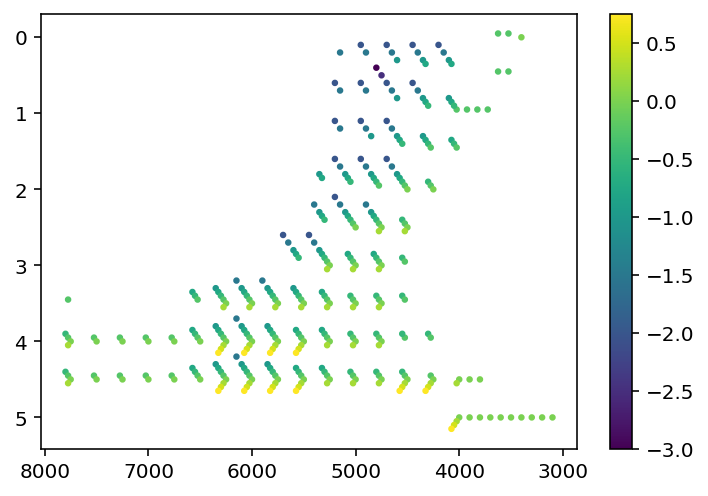

In [1083]:
selection = trained_3x3x3

f, ax = plt.subplots()
s = ax.scatter(
    grids['teff_subgrid'][selection] + np.abs(100*grids['fe_h_subgrid'][selection]),
    grids['logg_subgrid'][selection] + 0.2*grids['fe_h_subgrid'][selection],
    c = grids['fe_h_subgrid'][selection], s = 5
)
plt.colorbar(s, ax=ax)
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()
plt.close()

In [1084]:
s = 0
for g in priority['index_subgrid']:
    if g in trained_3x3x3:
        nr = priority['counts_dr4_init'][(priority['index_subgrid'] == g)][0]
        s += nr
        print(nr,s,"{:.1f}".format(100.*s/sum(priority['counts_dr4_init'])),"{:.1f}".format(100.*nr/sum(priority['counts_dr4_init'])))
    else:
        nr = priority['counts_dr4_init'][(priority['index_subgrid'] == g)][0]
        if nr > 500:
            print(nr)

35637 35637 3.9 3.9
30238 65875 7.2 3.3
29806 95681 10.5 3.3
28433 124114 13.6 3.1
24576 148690 16.3 2.7
23470 172160 18.9 2.6
20179 192339 21.1 2.2
18466 210805 23.1 2.0
18229 229034 25.1 2.0
17142 246176 27.0 1.9
16039 262215 28.8 1.8
15012 277227 30.4 1.6
13000 290227 31.8 1.4
12168 302395 33.2 1.3
11995 314390 34.5 1.3
11978 326368 35.8 1.3
11056 337424 37.0 1.2
10642 348066 38.2 1.2
10527 358593 39.3 1.2
10348 368941 40.5 1.1
9877 378818 41.5 1.1
9599 388417 42.6 1.1
9029 397446 43.6 1.0
8979 406425 44.6 1.0
8623 415048 45.5 0.9
8508 423556 46.5 0.9
8439 431995 47.4 0.9
8323 440318 48.3 0.9
8257 448575 49.2 0.9
8198 456773 50.1 0.9
8138 464911 51.0 0.9
8008 472919 51.9 0.9
7959 480878 52.7 0.9
7902 488780 53.6 0.9
7642 496422 54.4 0.8
7507 503929 55.3 0.8
7479 511408 56.1 0.8
7460 518868 56.9 0.8
7415 526283 57.7 0.8
7364 533647 58.5 0.8
7097 540744 59.3 0.8
6917 547661 60.1 0.8
6648 554309 60.8 0.7
6508 560817 61.5 0.7
6074 566891 62.2 0.7
6027 572918 62.8 0.7
5992 578910 63.5 0.

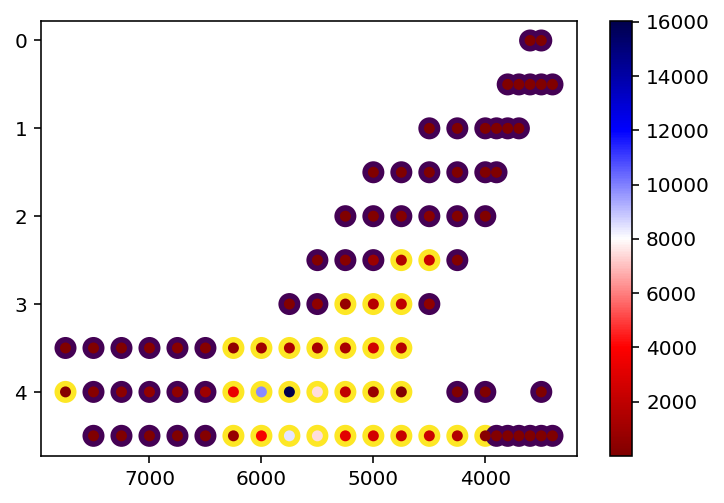

In [1085]:
selection = (priority['fe_h_subgrid'] == 0.25) & (priority['counts_dr4_init'] > 10)

done = []
for s in priority['index_subgrid'][selection]:
    if s in trained_3x3x3:
        done.append(1)
    else:
        done.append(0)

f, ax = plt.subplots()
s = ax.scatter(
    priority['teff_subgrid'][selection],
    priority['logg_subgrid'][selection],
    c = done,s=100,vmin=0,vmax=1
)
s = ax.scatter(
    priority['teff_subgrid'][selection],
    priority['logg_subgrid'][selection],
    c = priority['counts_dr4_init'][selection],s=20,cmap='seismic_r'
)
plt.colorbar(s, ax=ax)
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()
plt.close()